In [1]:
import qiskit
print(f"Qiskit version: {qiskit.__version__}")

Qiskit version: 1.1.2


In [2]:
from qiskit import QuantumCircuit

# Create a quantum circuit with one qbit
qc = QuantumCircuit(1)

qc.measure_all()

# Define initial_state as |1> = [0,1], and in plain English, it is a qubit resulting in the value 1 when observed.
initial_state = [0,1]

# Apply initialization operation on the qbit at position 0
qc.initialize(initial_state, 0)

In [3]:
# Prepare the simulation backend
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector

# Create an AerSimulator with statevector
backend = AerSimulator()
#backend = Aer.get_backend('statevector_simulator')

# Transpile the circuit for backend
qc_transpiled = transpile(qc, backend)

# Run the circuit
job = backend.run(qc_transpiled, shots=1000, memory=True, save_statevector=True)
result = job.result()


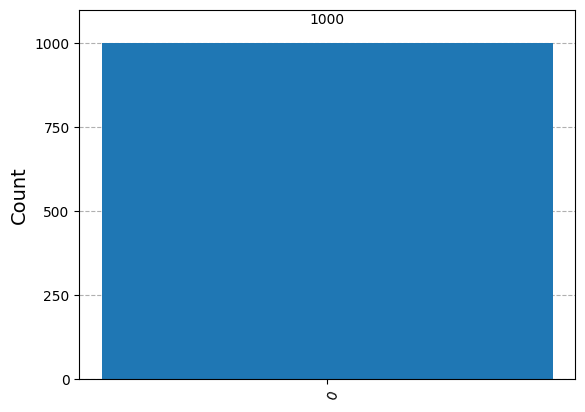

In [4]:
# The measured qbit
%matplotlib inline
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# Get the probability distribution
counts = result.get_counts()

# Show the histogram
plot_histogram(counts)
plt.show()

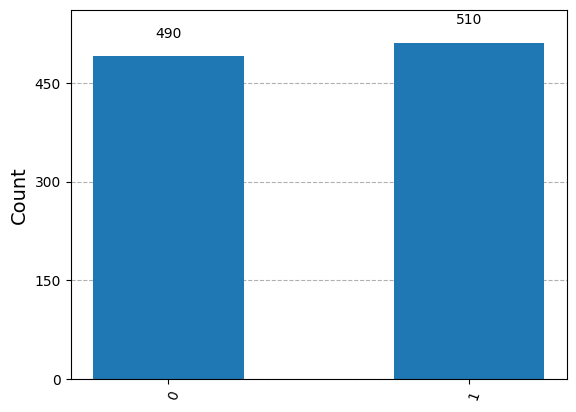

In [6]:
from math import sqrt

# First attempt to superpose two states

# Define state |psi>
initial_state = [1/sqrt(2), 1/sqrt(2)]

# Redefine the quantum circuit
qc = QuantumCircuit(1,1)

# Initialise the 0th qbit in the state 'initial_state'
qc.initialize(initial_state,0)

# Add measure
qc.measure(0,0)

# Create an AerSimulator with statevector
backend = AerSimulator()

# Transpile the circuit for backend
qc_transpiled = transpile(qc, backend)

# Run the circuit
job = backend.run(qc_transpiled, shots=1000, memory=True, save_statevector=True)
result = job.result()

# Plot the results
counts = result.get_counts()

# Show the histogram
plot_histogram(counts)
plt.show()

In [7]:
# It didn’t quite work. It tells us: 'Sum of amplitudes-squared is not 1, but 1.4142135623730951.'

In [8]:
# The amplitudes are the values in our array. They are proportional to proba-
# bilities. And all the probabilities should add up to exactly 1 (100%). We need
# to add weights to the quantum states |0⟩ and |1⟩. Let’s call them α and β .
# We weight |0⟩ with α and |1⟩ with β . Like this:
# |ψ⟩ =α|0⟩ +β |1⟩ = [1 ·α + 0 ·β]   [α] 
#                    [0 ·α + 1 ·β] = [β]
# Amplitudes are proportional to probabilities. We need to normalize them so
# that α2 +β 2 = 1. If both states |0⟩ and |1⟩ should have the same weight, then α = β .
# And therefore, we can solve our equation to α:
# α2 + α2 = 1 ⇔ 2 · α2 = 1 ⇔ α2 = 1/2 ⇔ α = 1/√2
# And we insert the value for both α andβ (both are equal). Let’s try this quan-
# tum state:
# |ψ⟩ = 1/√2|0⟩ + 1/√2|1⟩ = [1/√2]
#                           [1/√2]
# The corresponding array in Python is: [1/sqrt(2), 1/sqrt(2)]. Don’t forget to
# import sqrt.

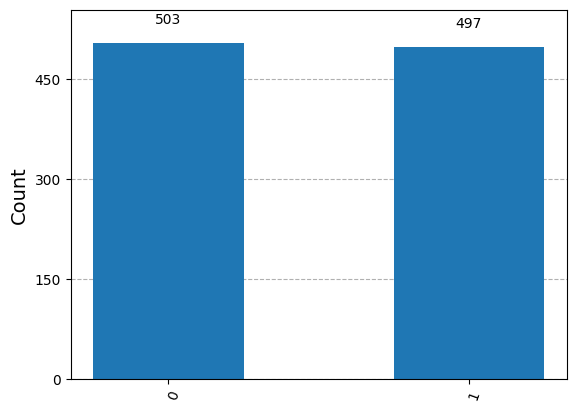

Counts:  {'1': 497, '0': 503}


In [9]:
# Weighted initial state

# Imports
from math import sqrt

# Define state |psi>
initial_state = [1/sqrt(2), 1/sqrt(2)]

# Redefine the quantum circuit
qc = QuantumCircuit(1,1) # 1 qubit, 1 classical bit

# Initialize the 0th qbit in the state 'initial_state'
qc.initialize(initial_state, 0)

# Add measurement
qc.measure(0,0)

# Create an AerSimulator
backend = AerSimulator()

# Transpile the circuit for backend
qc_transpiled = transpile(qc, backend)

# Run the circuit
job = backend.run(qc_transpiled, shots=1000)
result = job.result()

# Get the counts
counts = result.get_counts()

# Plot the histogram
plot_histogram(counts)
plt.show()

# Print the counts
print("Counts: ", counts)

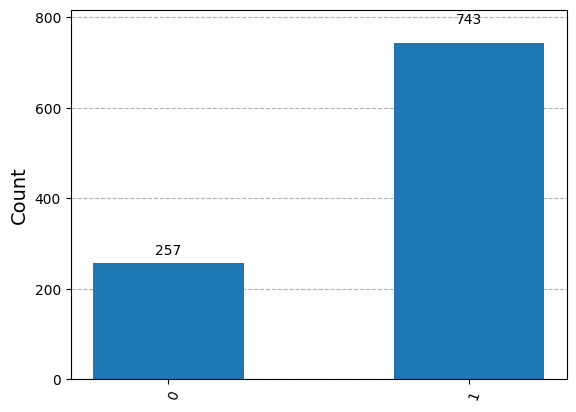

Counts:  {'0': 257, '1': 743}


In [10]:
# What is the state of a qbit that has 25% chance of resulting in 0 and 75% of resulting in 1?
# The vector for above is: [  1/2 ] 
#                          [ √3/2 ]
# in pyhon above vector is represented by the array [1/2, sqrt(3)/2]

# Define state |psi>
initial_state = [1/2, sqrt(3)/2]

# Redefine the quantum circuit
qc = QuantumCircuit(1,1) # 1 qubit,

# Initialize the 0th qbit in the state 'initial_state'
qc.initialize(initial_state, 0)

# Add measurement
qc.measure(0,0)

# Create an AerSimulator
backend = AerSimulator()

# Transpile the circuit for backend
qc_transpiled = transpile(qc, backend)

# Run the circuit
job = backend.run(qc_transpiled, shots=1000)
result = job.result()

# Get the counts
counts = result.get_counts()

# Plot the histogram
plot_histogram(counts)
plt.show()

# Print the counts
print("Counts: ", counts)

Counts:  {'1': 350, '0': 650}


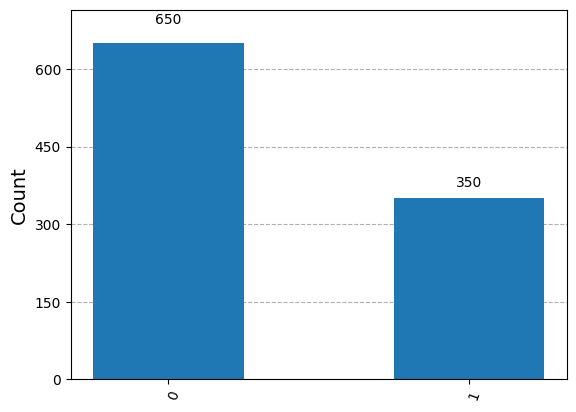

In [11]:
# Using theta to specify the quantum state vector

from math import cos, pi, sin

def get_state (theta):
    """returns a valid state vector"""
    return [cos(theta/2), sin(theta/2)]

# play with the values for theta to get the feeling
theta = 5#-pi/2

# create, initilize, and execute the quantum circuit
qc = QuantumCircuit(1,1)
qc.initialize(get_state(theta), 0)
qc.measure(0,0)
backend = AerSimulator()
qc_transpiled = transpile(qc, backend)
job = backend.run(qc_transpiled, shots=1000)
result = job.result()
counts = result.get_counts()

# Print the counts
print("Counts: ", counts)

# Show the histogram
plot_histogram(counts)
plt.show()

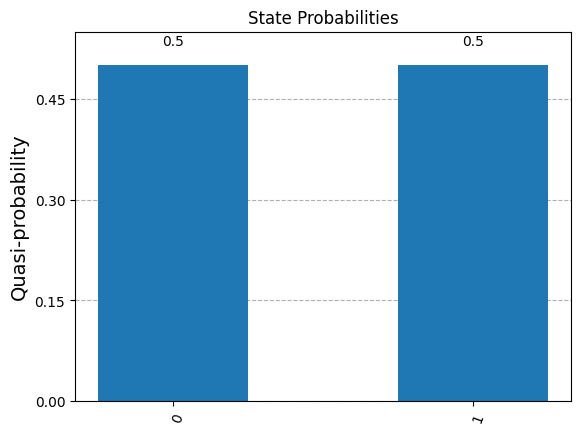

Statevector: Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))
Bloch vector components (x, y, z): (np.float64(0.9999999999999998), np.float64(0.0), np.float64(0.0))
Probabilities: [0.5 0.5]


In [12]:
# Exploring the Observer effect
# A circuit without measurement

from math import sqrt
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Statevector
import matplotlib.pyplot as plt

# Create a quantum circuit with one qubit
qc = QuantumCircuit(1)

# Define state |Psi>
initial_state = [1/sqrt(2), 1/sqrt(2)]

# Apply initialization operation to the qubit at position 0
qc.initialize(initial_state, 0)

# Get the statevector using Statevector.from_instruction
statevector = Statevector.from_instruction(qc)

# Calculate Bloch vector components
x = 2 * statevector.data[0].real * statevector.data[1].real + 2 * statevector.data[0].imag * statevector.data[1].imag
y = 2 * statevector.data[0].real * statevector.data[1].imag - 2 * statevector.data[0].imag * statevector.data[1].real
z = abs(statevector.data[0])**2 - abs(statevector.data[1])**2

# Calculate probabilities and plot as a histogram
probabilities = statevector.probabilities()
plot_histogram({'0': probabilities[0], '1': probabilities[1]})
plt.title("State Probabilities")
plt.show()

# Print the statevector, Bloch vector components, and probabilities
print("Statevector:", statevector)
print("Bloch vector components (x, y, z):", (x, y, z))
print("Probabilities:", probabilities)

In [13]:
# Draw the circuit

qc.draw(output='text')

┌─────────────────────────────┐
q: ┤ Initialize(0.70711,0.70711) ├
   └─────────────────────────────┘

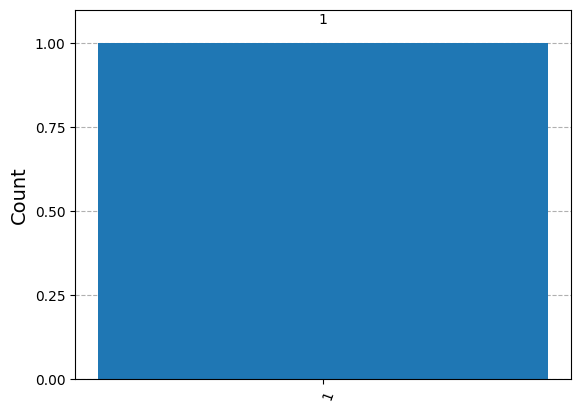

Counts:  {'1': 1}


In [14]:
# Circuit with measurement
qc = QuantumCircuit(1,1)
qc.initialize(initial_state,0)

# Observe the qBit
qc.measure(0,0)

# Create a simulator
backend = AerSimulator()

# Transpile the circuit for the backend
qc_transpiled = transpile(qc, backend)

# Run simulation
job = backend.run(qc_transpiled, shots=1)
result = job.result()

# Get counts
counts = result.get_counts()

# Plot histogram
plot_histogram(counts)
plt.show()

# Print counts
print("Counts: ", counts)

In [15]:
# Draw out the circuit with measurement
qc.draw(output='text')

┌─────────────────────────────┐┌─┐
  q: ┤ Initialize(0.70711,0.70711) ├┤M├
     └─────────────────────────────┘└╥┘
c: 1/════════════════════════════════╩═
                                     0

In [16]:
# Our circuit now contains a measurement. That is an observation. It pulls our
# qubit out of a superposition state and lets it collapse into either 0 or 1.

In [17]:
# Sometimes, we refer to measurement as collapsing the state of the qubit.
# This notion emphasizes the effect a measurement has. Unlike classical pro-
# gramming, where you can inspect, print, and show values of your bits as often
# as you like, in quantum programming, measurement has an effect on your results.

In [18]:
# If we constantly measured our qubit to keep track of its value, we would keep
# it in a well-defined state, either 0 or 1. Such a qubit wouldn’t be different from
# a classical bit. Our computation could be easily replaced by a classical compu-
# tation. In quantum computation, we must allow the qubits to explore more
# complex states. Measurements are therefore only used when we need to ex-
# tract an output. This means that we often place all measurements at the end
# of our quantum circuit.

        ┌─────────────────────────────┐ ░ ┌─┐
     q: ┤ Initialize(0.70711,0.70711) ├─░─┤M├
        └─────────────────────────────┘ ░ └╥┘
   c: 1/═══════════════════════════════════╬═
                                           ║ 
meas: 1/═══════════════════════════════════╩═
                                           0 


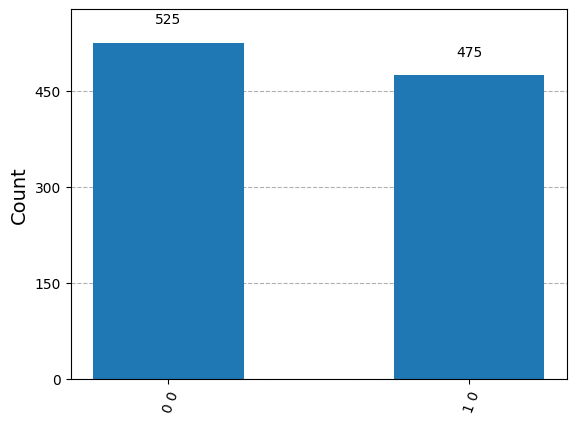

Statevector:  Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))
Sannolikheter:  <bound method Statevector.probabilities of Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))>
Bloch-vektor (x, y, z:  (np.float64(0.9999999999999998), np.float64(0.0), np.float64(0.0))


In [19]:
# Parameterized Quantum Circuit (PQC)
# A simple PQC binary classifier

qc = QuantumCircuit(1,1)
initial_state = [1/sqrt(2), 1/sqrt(2)]
qc.initialize(initial_state, 0)
qc.measure_all()

# Visualize the circuit
print(qc)

# Simulate the circuit
simulator = AerSimulator()
result = simulator.run(qc, shots=1000).result()
counts = result.get_counts()

# Plot the results
plot_histogram(counts)
plt.show()

# Plot statevector before measurement
statevector = Statevector.from_instruction(qc.remove_final_measurements(inplace=False))

# Calculate components of Bloch-vector
#bloch_vector = statevector.expectation_value(["X","Y","Z"])

# Plot the Bloch-vector
#plot_bloch_vector(bloch_vector)
#plt.show()

# Print probabilities
print("Statevector: ", statevector)
print("Sannolikheter: ", statevector.probabilities)

# Manual calculation of the components of the Bloch-vector
x = 2 * statevector.data[0].real * statevector.data[1].real + 2 * statevector.data[0].imag * statevector.data[1].imag
y = 2 * statevector.data[0].real * statevector.data[1].imag - 2 * statevector.data[0].imag * statevector.data[1].real
z = abs(statevector.data[0])**2 - abs(statevector.data[1])**2
print("Bloch-vektor (x, y, z: ", (x, y, z))

In [20]:
# The parameterized quantum circuit classifier
from sklearn.metrics import recall_score, precision_score, confusion_matrix

def pqc_classify(backend, passenger_state):
    """
    backend - a qiskit backend to run the quantum circuit at
    passanger_state - a valid quantum state vector
    """

    # Create a quantum circuit with one qbit and one classical bit
    qc = QuantumCircuit(1,1)

    # Define state |Psi> and initialize the circuit
    qc.initialize(passenger_state, 0)

    # Measure the qbit
    qc.measure(0,0)

    # Transpile the circuit for the backend
    qc_transpiled = transpile(qc, backend)

    # Run the quantum circuit
    job = backend.run(qc_transpiled, shots=1)
    result = job.result()

    # Get the counts, these are either {'0':1} or {'1':1}
    counts = result.get_counts(qc)

    # Get the bit 0 or 1
    return int(list(counts.keys())[0])

In [21]:
# Test pqc_classify function
backend = AerSimulator()
test_state = [1/sqrt(2), 1/sqrt(2)]
classification = pqc_classify(backend, test_state)
print(f"Classification result: {classification}")

Classification result: 0


In [22]:
# Load the prepared passenger data
import numpy as np

with open('../data/train.npy', 'rb') as f:
    train_input = np.load(f)
    train_labels = np.load(f)

with open('../data/test.npy', 'rb') as f:
    test_input = np.load(f)
    test_labels = np.load(f)

In [23]:
def run(f_classify, x):
    """Runs classifier"""
    return list(map(f_classify, x))

In [24]:
def classify(passenger):
    """Baseline model, random classifier"""
    import random
    random.seed(a=None, version=2)
    return random.randint(0, 1)

In [26]:
# Import helperfunctions
from helper_functions import classifier_report
from sklearn.metrics import confusion_matrix, precision_score, recall_score

# Tell Qiskit how to simulate our circuit
backend = AerSimulator()

# Specify the quantum state that results in either 0 or 1
initial_state = [1/sqrt(2), 1/sqrt(2)]

classifier_report(
    "Random PQC",
    run,
    classify,
    train_input,
    train_labels)

The precision score of the Random PQC classifier is 0.38
The recall score of the Random PQC classifier is 0.50
The specificity score of the Random PQC classifier is 0.51
The npv score of the Random PQC classifier is 0.63
The information level is: 0.50


In [27]:
# To improve our classifier, we need to use the passenger data. However, even
# though we prepared the passenger data into normalized numerical data, it
# does not fit the quantum state vector we need to feed into our PQC. Therefore,
#we need to pre-process our passenger data to be computable by a quantum computer.

In [28]:
# Calculate the correlation coefficents
from scipy.stats import spearmanr

# separate the trsining data into a list of the columns
columns = [list(map(lambda passenger: passenger[i], train_input)) for i in range(0,7)]

# calculate the correlation coefficient for each column
correlations = list(map(lambda col: spearmanr(col, train_labels)[0], columns))
correlations     

[np.float64(-0.32942190126435816),
 np.float64(-0.5346952997514155),
 np.float64(-0.06868256264777223),
 np.float64(0.10836723346297837),
 np.float64(0.14957565981970067),
 np.float64(0.3029816535162869),
 np.float64(-0.2019977574275163)]

In [29]:
def get_overall_probability(features, weights):
    """
    features -- list of the features of a passenger
    weights -- list of all features weights
    """
    return reduce(
    lambda result, data: result + weigh_feature(*data),
    zip(features, weights),
    0
    )


In [30]:
# Weighting pre-processing
from math import pi, sin, cos
#from helper_functions import get_overall_probability

def get_state (theta):
    """returns a valid state vector from angle theta"""
    return [cos(theta/2), sin(theta/2)]

def pre_process_weighted(passenger):
    """
    passenger -- the normalized (array of numeric data) passenger data
    returns a valid quantum state
    """

    # calculate the overall probability
    mu = get_overall_probability(passenger, correlations)

    # theta between 0 [|0> and pi (|1>)
    quantum_state = get_state((1-mu)*pi)

    return quantum_state


In [33]:
# Run the PQC with the weighted pre-processing
from helper_functions import post_process, pqc, weigh_feature
from functools import reduce
#from qiskit import execute

backend = AerSimulator()

classifier_report("Variational",
                  run,
                  lambda passenger: post_process(pqc(backend, pre_process_weighted(passenger))),
                  train_input,
                  train_labels)
                  

AttributeError: 'QuantumCircuit' object has no attribute 'result'